In [1]:
import os
import glob
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
py.sign_in(username='jd561996', api_key='NAaKPCM0BgyS5nQjMWqi')

In [2]:
df1 = pd.concat([pd.read_csv(file,sep=';\t',engine='python').assign(VM=os.path.basename(file).split('.')[0]) for file in glob.glob('2013-7/*.csv')], ignore_index=True)
main_df=pd.concat
df2= pd.concat([pd.read_csv(file,sep=';\t',engine='python',).assign(VM=os.path.basename(file).split('.')[0]) for file in glob.glob('2013-8/*.csv')], ignore_index=True)
df3= pd.concat([pd.read_csv(file,sep=';\t',engine='python').assign(VM=os.path.basename(file).split('.')[0]) for file in glob.glob('2013-9/*.csv')], ignore_index=True)

df=df1.append(df2)
df=df.append(df3)
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],VM
0,1372629804,2,5851.998900,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667,1
1,1372630104,2,5851.998900,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000,1
2,1372630404,2,5851.998900,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667,1
3,1372630704,2,5851.998900,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000,1
4,1372631004,2,5851.998900,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4268718,1380490730,2,5199.999252,109.199984,2.100000,8359936.0,1.230312e+05,0.000000,15.266667,4.666667,0.000000,99
4268719,1380491030,2,5199.999252,86.666654,1.666667,8359936.0,3.187656e+05,0.000000,9.600000,4.600000,0.000000,99
4268720,1380491330,2,5199.999252,91.866653,1.766667,8359936.0,8.388400e+04,0.000000,10.133333,4.600000,0.000000,99
4268721,1380491630,2,5199.999252,83.199988,1.600000,8359936.0,1.845488e+05,0.000000,10.266667,4.466667,0.000000,99


In [3]:
df['Timestamp']=pd.to_datetime(df['Timestamp [ms]'],unit='s')
df['weekdays']=df['Timestamp'].dt.dayofweek
df['weekends']=((df.weekdays)//5==1).astype(float)
df['months']=df['Timestamp'].dt.month
df['days']=df['Timestamp'].dt.day
df.set_index('Timestamp',inplace=True)
df["CPU usage prev"] = df['CPU usage [%]'].shift(1)
df["CPU_diff"] = df['CPU usage [%]'] - df["CPU usage prev"]
df["received_prev"] = df['Network received throughput [KB/s]'].shift(1)
df["received_diff"] = df['Network received throughput [KB/s]']- df["received_prev"]
df["transmitted_prev"] =df['Network transmitted throughput [KB/s]'].shift(1)
df["transmitted_diff"] = df['Network transmitted throughput [KB/s]']- df["transmitted_prev"]
df=df.dropna()
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],...,weekdays,weekends,months,days,CPU usage prev,CPU_diff,received_prev,received_diff,transmitted_prev,transmitted_diff
Timestamp,,,,,,,,,,,,,,,,,,,,,
2013-06-30 22:08:24,1372630104,2,5851.998900,29.259995,0.500000,8218624.0,458575.466667,0.000000,2.333333,0.200000,...,6,1.0,6,30,1.500000,-1.000000,0.266667,-0.066667,1.466667,-0.466667
2013-06-30 22:13:24,1372630404,2,5851.998900,27.309328,0.466667,8218624.0,184548.000000,32.066667,4.200000,0.133333,...,6,1.0,6,30,0.500000,-0.033333,0.200000,-0.066667,1.000000,0.066667
2013-06-30 22:18:24,1372630704,2,5851.998900,23.407996,0.400000,8218624.0,78292.266667,0.000000,0.866667,0.066667,...,6,1.0,6,30,0.466667,-0.066667,0.133333,-0.066667,1.066667,-0.066667
2013-06-30 22:23:24,1372631004,2,5851.998900,19.506663,0.333333,8218624.0,167772.000000,0.000000,0.200000,0.133333,...,6,1.0,6,30,0.400000,-0.066667,0.066667,0.066667,1.000000,0.000000
2013-06-30 22:28:24,1372631304,2,5851.998900,29.259995,0.500000,8218624.0,39146.133333,0.000000,0.266667,0.200000,...,6,1.0,6,30,0.333333,0.166667,0.133333,0.066667,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-29 21:38:50,1380490730,2,5199.999252,109.199984,2.100000,8359936.0,123031.200000,0.000000,15.266667,4.666667,...,6,1.0,9,29,1.600000,0.500000,4.400000,0.266667,0.000000,0.000000
2013-09-29 21:43:50,1380491030,2,5199.999252,86.666654,1.666667,8359936.0,318765.600000,0.000000,9.600000,4.600000,...,6,1.0,9,29,2.100000,-0.433333,4.666667,-0.066667,0.000000,0.000000
2013-09-29 21:48:50,1380491330,2,5199.999252,91.866653,1.766667,8359936.0,83884.000000,0.000000,10.133333,4.600000,...,6,1.0,9,29,1.666667,0.100000,4.600000,0.000000,0.000000,0.000000


In [4]:
df2 = df.resample('H').mean()
df2

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],...,weekdays,weekends,months,days,CPU usage prev,CPU_diff,received_prev,received_diff,transmitted_prev,transmitted_diff
Timestamp,,,,,,,,,,,,,,,,,,,,,
2013-06-30 22:00:00,1.372631e+09,2.753089,7474.863553,328.875050,3.798925,9.551611e+06,363726.770575,137.835673,82.234580,35.926785,...,6.0,1.0,6.0,30.0,3.807435,-0.008510,35.464022,0.462762,63.973392,3.170378
2013-06-30 23:00:00,1.372635e+09,2.752941,7474.545341,356.376365,4.176938,9.551401e+06,354064.129946,178.901434,117.114080,47.538231,...,6.0,1.0,6.0,30.0,4.132685,0.044252,47.306336,0.231895,80.188139,-0.119033
2013-07-01 00:00:00,1.372639e+09,2.752941,7474.545338,337.242291,3.901431,9.551433e+06,341599.059046,189.610372,220.076727,54.814559,...,0.0,0.0,7.0,1.0,3.949407,-0.047976,54.418951,0.395608,92.932922,1.055660
2013-07-01 01:00:00,1.372642e+09,2.752941,7474.545340,323.490043,3.832667,9.551525e+06,338077.103111,319.383570,184.373525,43.521722,...,0.0,0.0,7.0,1.0,3.789938,0.042729,44.260977,-0.739255,94.273415,1.174732
2013-07-01 02:00:00,1.372646e+09,2.752941,7474.545342,339.600603,4.024352,9.551687e+06,349554.626393,277.077257,217.302736,38.045880,...,0.0,0.0,7.0,1.0,4.021442,0.002910,37.933567,0.112314,71.071459,-2.989582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-29 17:00:00,1.380476e+09,2.144161,5815.660194,216.036210,2.587369,6.281650e+06,235186.390052,89.147705,71.798250,44.191502,...,6.0,1.0,9.0,29.0,2.582471,0.004898,44.433312,-0.241810,34.061332,0.075221
2013-09-29 18:00:00,1.380479e+09,2.144161,5815.660194,217.214133,2.607006,6.281953e+06,234831.376169,44.449536,56.125042,90.351943,...,6.0,1.0,9.0,29.0,2.616932,-0.009925,88.077069,2.274874,49.720958,1.783239
2013-09-29 19:00:00,1.380483e+09,2.144161,5815.660194,217.425641,2.604474,6.285949e+06,232609.193467,120.688159,58.136871,67.257971,...,6.0,1.0,9.0,29.0,2.605647,-0.001173,65.638724,1.619247,43.363198,1.198761


In [5]:
df1 = df.resample('12H').mean()
train1=df2[0:1528]
test1=df2[1528:]

In [6]:
train=df1[0:128]
test=df1[128:]


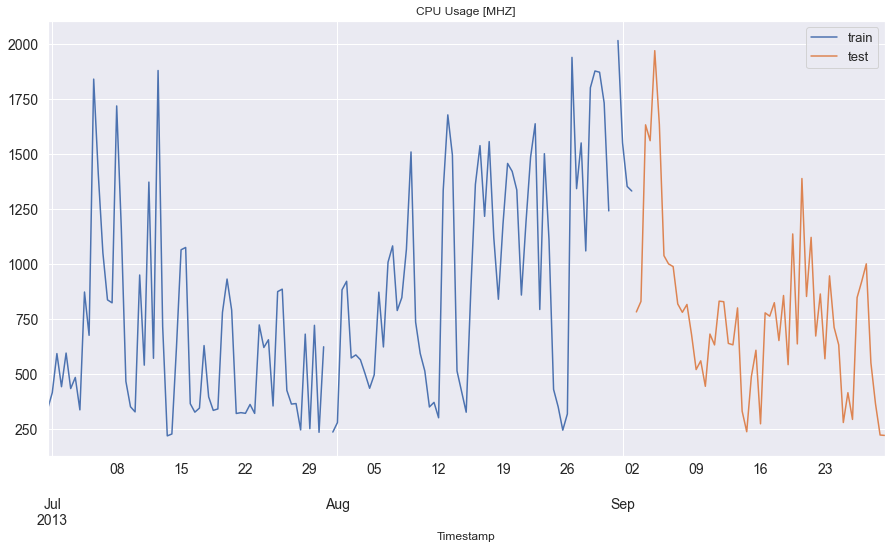

In [7]:
import seaborn as sns
sns.set()
train['CPU usage [MHZ]'].plot(figsize=(15,8), title= 'CPU Usage [MHZ]', fontsize=14,label='train')
test['CPU usage [MHZ]'].plot(figsize=(15,8), title= 'CPU Usage [MHZ]', fontsize=14,label='test')
plt.legend(loc='best',fontsize=13)
plt.show()


In [8]:

naive= test.copy()
naive['CPU usage [MHZ]'] =  test['CPU usage [MHZ]']
naive['CPU usage [MHZ]-1'] = naive['CPU usage [MHZ]'].shift(1)

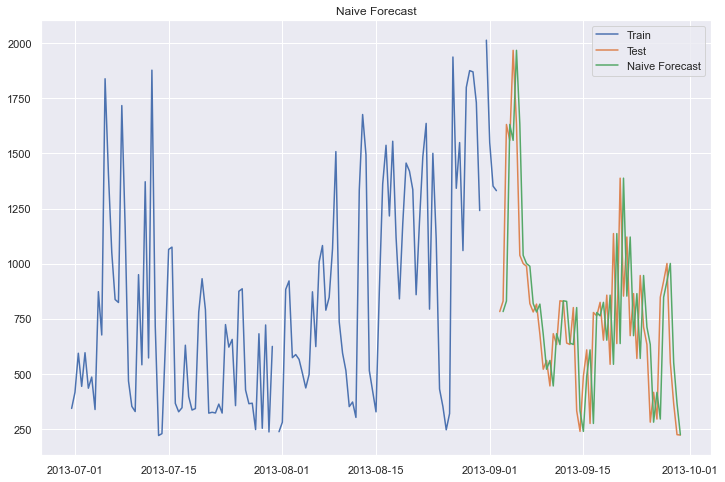

In [9]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['CPU usage [MHZ]'], label='Train')
plt.plot(test.index,test['CPU usage [MHZ]'], label='Test')
plt.plot(naive.index,naive['CPU usage [MHZ]-1'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()
naive=naive.dropna()

In [10]:
test=test[1:]
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['CPU usage [MHZ]'], naive['CPU usage [MHZ]-1']))
print("RMSE of Naive Model:",rms)

RMSE of Naive Model: 309.2060416700818


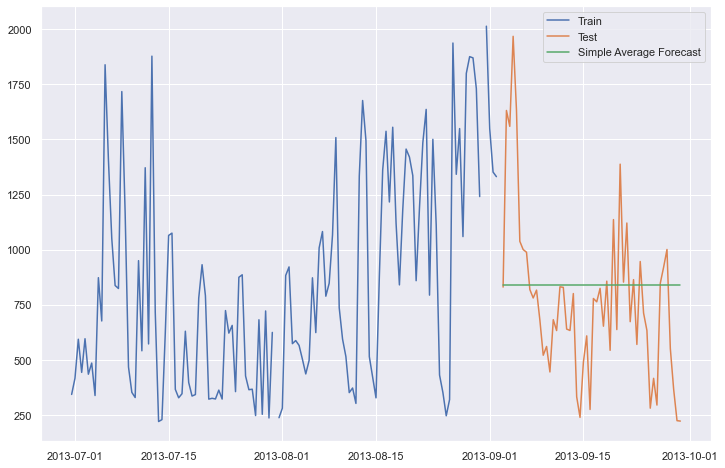

RMSE of Simple Average Model: 371.956986990622


In [11]:
simple_avg = test.copy()
simple_avg['avg_forecast'] = train['CPU usage [MHZ]'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['CPU usage [MHZ]'], label='Train')
plt.plot(test['CPU usage [MHZ]'], label='Test')
plt.plot(simple_avg['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test['CPU usage [MHZ]'], simple_avg['avg_forecast']))
print("RMSE of Simple Average Model:",rms)

<Figure size 1800x360 with 0 Axes>

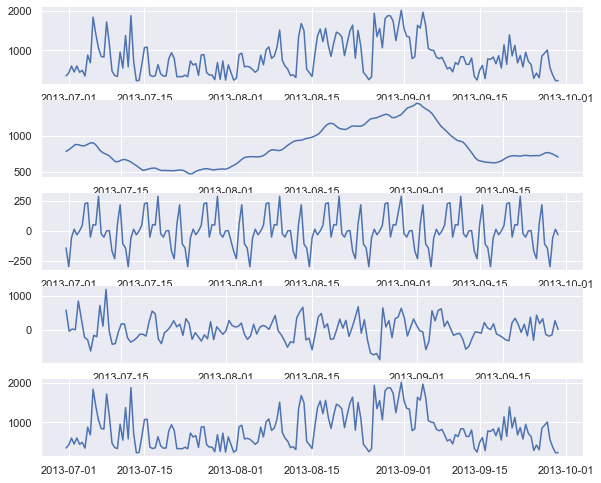

In [12]:

df1=df1.dropna()
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


### HOURLY OR RAW???

decomp = seasonal_decompose(df1['CPU usage [MHZ]'], model="additive",period=22)

plt.figure(figsize=(25,5))
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(5)
fig.set_size_inches(9.7, 8.27)


ax1.plot(df1['CPU usage [MHZ]'])
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(decomp.resid)
ax5.plot(decomp.observed)
sns.despine()



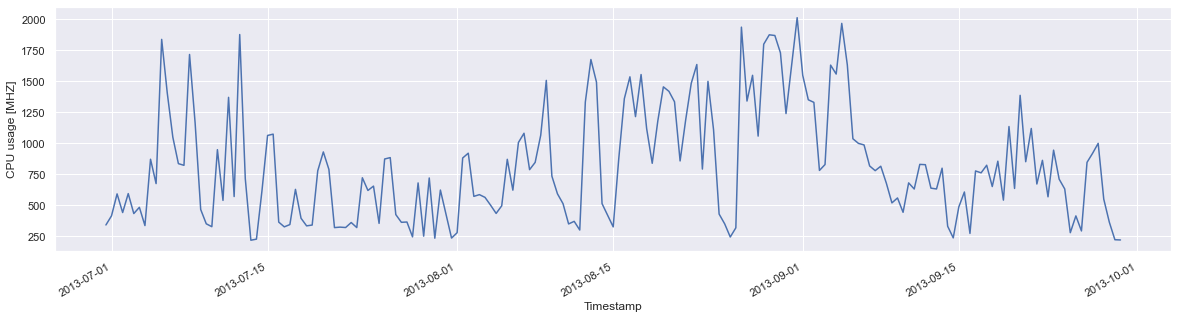

In [13]:
#plot cpu usage between time period
plt.figure(figsize=(20,5))
df1['CPU usage [MHZ]'].plot()
plt.ylabel('CPU usage [MHZ]')
plt.show()

<ipython-input-117-37220adeca05>:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-pack

                              ARMA Model Results                              
Dep. Variable:        CPU usage [MHZ]   No. Observations:                 1528
Model:                     ARMA(2, 3)   Log Likelihood              -10379.633
Method:                       css-mle   S.D. of innovations            215.584
Date:                Mon, 03 May 2021   AIC                          20773.266
Time:                        15:29:51   BIC                          20810.588
Sample:                             0   HQIC                         20787.157
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   856.6945     72.662     11.790      0.000     714.280     999.109
ar.L1.CPU usage [MHZ]     0.3521      0.088      3.984      0.000       0.179       0.525
ar.L2.CP

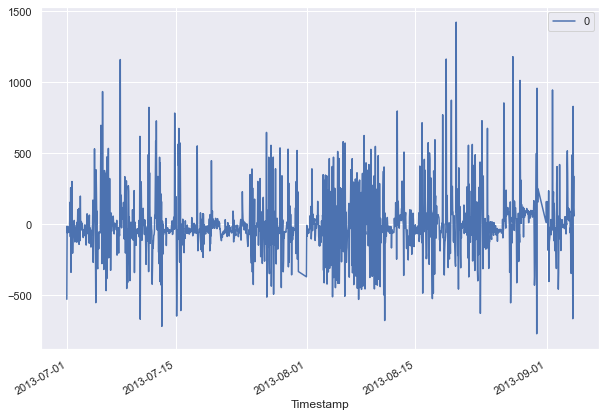

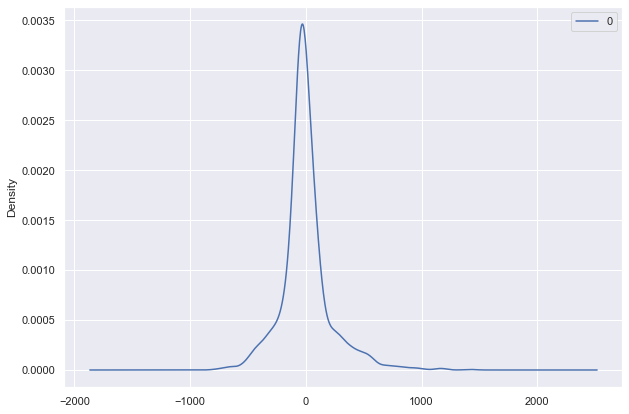

                 0
count  1528.000000
mean      0.324488
std     216.015951
min    -770.477473
25%     -79.105230
50%     -24.336821
75%      63.946515
max    1421.861482


In [117]:
train=train.dropna()
train1=train1.dropna()
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
#ARIMA MODEL
model = ARIMA(train1['CPU usage [MHZ]'], order=(2,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe()) ### pretty close to 0

## Rolling forecast for the ARIMA model 

In [16]:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)
df2=df2.dropna()


X = df2['CPU usage [MHZ]']
size = int(len(X) * 0.75)
trainx, testx = X[0:size], X[size:len(X)]
observation = [x for x in trainx]
predictions = list()
for t in range(len(testx)):
    model = ARIMA(observation, order=(2,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testx[t]
    observation.append(obs)
    
error = mean_squared_error(testx, predictions)
print('Test MSE: %.3f' % error)



C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

Test MSE: 28463.734


In [19]:
testnew = testx
testnew= testnew.reset_index(drop = True)
prednew = pd.Series( (v[0] for v in predictions) )


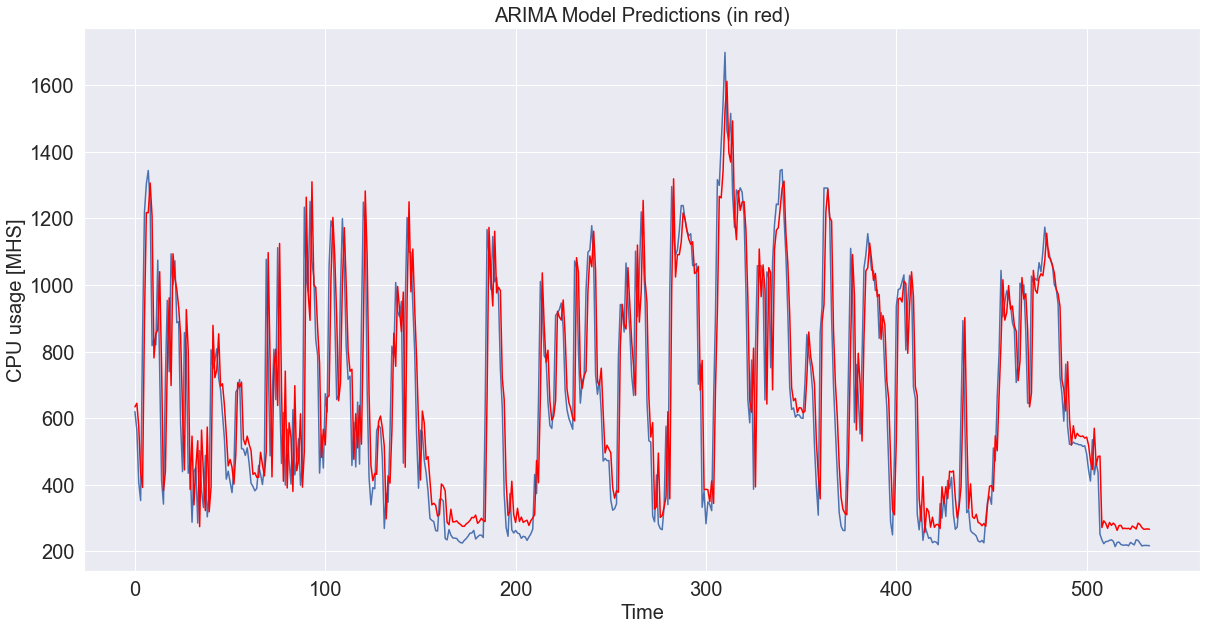

In [20]:
plt.figure(figsize=(20,10))
plt.plot(testnew)
plt.plot(prednew, color='red')
plt.tick_params(labelsize=20)
plt.title("ARIMA Model Predictions (in red)", fontsize = 20)
plt.ylabel("CPU usage [MHS]", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.show();


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [23]:
mae = mean_absolute_error(testx, predictions)
mse = mean_squared_error(testx, predictions)
r2 = r2_score(testx, predictions)

print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2))


MAE (test): 122
MSE (test): 28464
R2  (test): 0.750


In [24]:

def moving_average(series, n):

    return np.average(series[-n:])


In [25]:
moving_average(df2,24)

66046716.67595255

In [26]:
from sklearn.metrics import mean_absolute_error
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

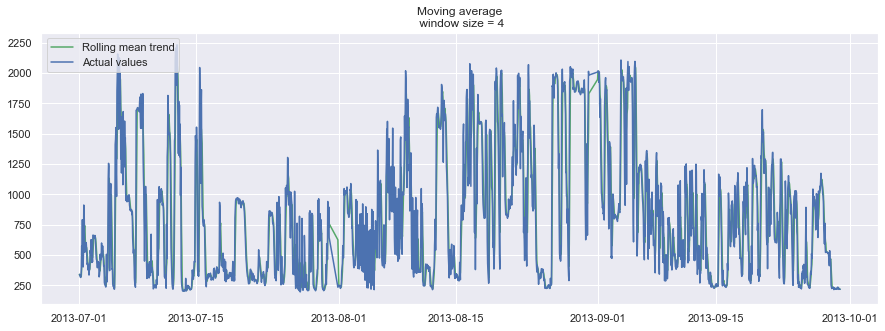

In [27]:
plotMovingAverage(df2[['CPU usage [MHZ]']],4)

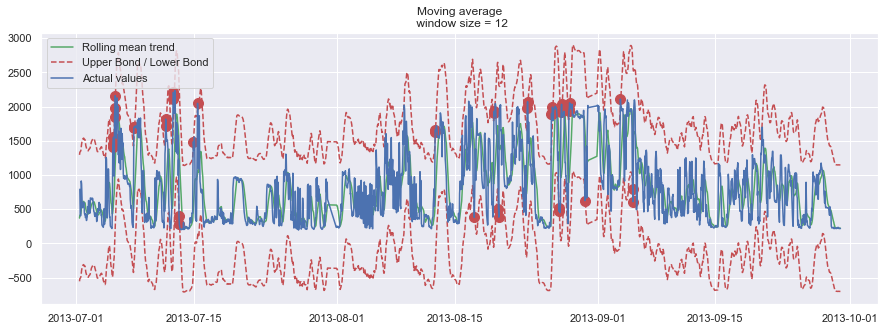

In [28]:
from sklearn.metrics import mean_squared_error
df2=df2.dropna()
plotMovingAverage(df2[['CPU usage [MHZ]']],12,plot_intervals=True,plot_anomalies=True)

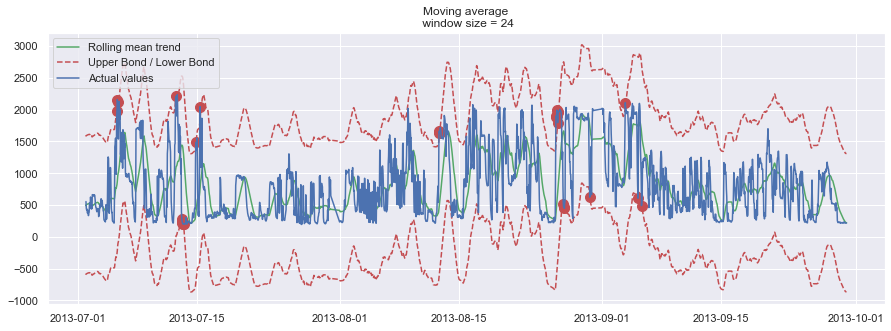

In [29]:
plotMovingAverage(df2[['CPU usage [MHZ]']],24,plot_intervals=True,plot_anomalies=True)

# Is Time Series is Stationary or not?

In [30]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

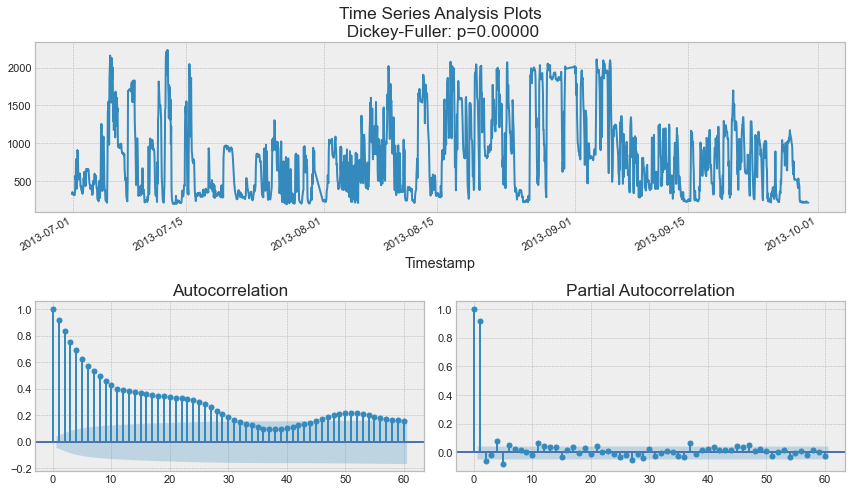

In [31]:
tsplot(df2['CPU usage [MHZ]'],lags=60)

##  Augmented Dickey-Fuller test to check attribute is stationary or not? 

In [32]:

df2=df2[['CPU cores','CPU capacity provisioned [MHZ]','CPU usage [MHZ]','CPU usage [%]','Memory capacity provisioned [KB]','Memory usage [KB]','Disk read throughput [KB/s]','Disk write throughput [KB/s]','Network received throughput [KB/s]']]
train1=df2[0:1528]
test1=df2[1528:]

# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(ds):
    dftest = adfuller(ds, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
        adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")


for i in train1.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(train1[i])
    print('\n')




Column:  CPU cores
--------------------------------------
Test Statistic            -4.726630
p-value                    0.000075
# Lags                     3.000000
# Observations          1524.000000
Critical Value (1%)       -3.434648
Critical Value (5%)       -2.863438
Critical Value (10%)      -2.567781
dtype: float64

Series is Stationary


Column:  CPU capacity provisioned [MHZ]
--------------------------------------
Test Statistic            -4.813628
p-value                    0.000051
# Lags                     3.000000
# Observations          1524.000000
Critical Value (1%)       -3.434648
Critical Value (5%)       -2.863438
Critical Value (10%)      -2.567781
dtype: float64

Series is Stationary


Column:  CPU usage [MHZ]
--------------------------------------
Test Statistic            -5.206373
p-value                    0.000009
# Lags                    14.000000
# Observations          1513.000000
Critical Value (1%)       -3.434679
Critical Value (5%)       -2.863452
C

In [33]:
data=train1
data

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s]
Timestamp,,,,,,,,,
2013-06-30 22:00:00,2.753089,7474.863553,328.875050,3.798925,9.551611e+06,363726.770575,137.835673,82.234580,35.926785
2013-06-30 23:00:00,2.752941,7474.545341,356.376365,4.176938,9.551401e+06,354064.129946,178.901434,117.114080,47.538231
2013-07-01 00:00:00,2.752941,7474.545338,337.242291,3.901431,9.551433e+06,341599.059046,189.610372,220.076727,54.814559
2013-07-01 01:00:00,2.752941,7474.545340,323.490043,3.832667,9.551525e+06,338077.103111,319.383570,184.373525,43.521722
2013-07-01 02:00:00,2.752941,7474.545342,339.600603,4.024352,9.551687e+06,349554.626393,277.077257,217.302736,38.045880
...,...,...,...,...,...,...,...,...,...
2013-09-04 09:00:00,2.901804,7822.588466,1083.353709,6.925293,8.969139e+06,824620.126735,151.080452,83.149811,105.577454
2013-09-04 10:00:00,2.901804,7822.588469,1836.913065,10.507125,8.971996e+06,935337.797002,150.852489,91.886841,171.944732
2013-09-04 11:00:00,2.901804,7822.588467,1928.602644,11.063948,8.971387e+06,811486.647956,101.453428,172.801905,203.299611


## how to get optimal value of P?

In [34]:
from statsmodels.tsa.api import VAR
var_model=VAR(data)

result = []
result_aic=[]
for p in range(1,50):
    result = var_model.fit(p)
    print(f'Order : {p}, AIC:  {result.aic}, BIC: { result.bic}')
    result_aic.append(result.aic)
    

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Order : 1, AIC:  70.79324853663648, BIC: 71.10745641317196
Order : 2, AIC:  70.36784114899511, BIC: 70.96515392175094
Order : 3, AIC:  70.19334055760105, BIC: 71.07405985047872
Order : 4, AIC:  70.08582886545797, BIC: 71.25025682751185
Order : 5, AIC:  69.98392654334396, BIC: 71.43236585004034
Order : 6, AIC:  69.97783417197279, BIC: 71.71058802645288
Order : 7, AIC:  69.97642074183088, BIC: 71.9937928761776
Order : 8, AIC:  69.98399334438638, BIC: 72.286288020895
Order : 9, AIC:  70.0030154083455, BIC: 72.59053742079821
Order : 10, AIC:  70.04890123029094, BIC: 72.92195590523535
Order : 11, AIC:  70.07537181225192, BIC: 73.23426501028334
Order : 12, AIC:  70.1225073477497, BIC: 73.56754546479752
Order : 13, AIC:  69.87145210196383, BIC: 73.60294207058162
Order : 14, AIC:  69.8713349113579, BIC: 73.88958420201777
Order : 15, AIC:  69.87924145631841, BIC: 74.184558078709
Order : 16, AIC:  69.83667255700045, BIC: 74.42936506132916
Order : 17, AIC:  69.61496734722067, BIC: 74.495344825519

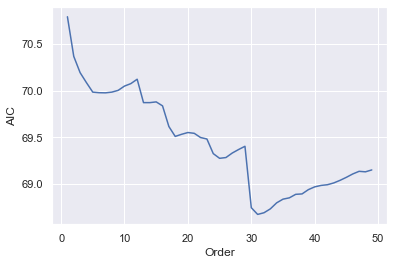

In [35]:
import seaborn as sns
sns.set()
plt.plot(list(np.arange(1,50,1)), result_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [36]:
results=var_model.fit(31)
display(result.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, May, 2021
Time:                     14:31:03
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    83.4017
Nobs:                     1479.00    HQIC:                   74.4623
Log likelihood:          -66045.1    FPE:                1.27211e+30
AIC:                      69.1489    Det(Omega_mle):     1.20918e+29
--------------------------------------------------------------------
Results for equation CPU cores
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                         -0.010010         0.045538           -0.220           0.826
L1.CPU cores                                   1.469155       

In [37]:
lag_order = result.k_ar
print(lag_order)

49


In [38]:
forecast_input = data.values[-lag_order:]
forecast=result.forecast(y=forecast_input,steps=608)

In [39]:
prediction=pd.DataFrame(forecast,index=df2.index[-608:],columns=df2.columns)

In [40]:
prediction

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s]
Timestamp,,,,,,,,,
2013-09-04 14:00:00,2.900832,7814.585280,2294.118164,13.370376,8.953996e+06,765948.916998,98.931522,138.821062,78.266911
2013-09-04 15:00:00,2.884185,7772.324458,2349.092490,13.603207,8.895821e+06,790961.451263,94.466261,162.022207,83.608077
2013-09-04 16:00:00,2.905076,7827.995070,2475.491684,14.267878,8.959951e+06,893617.827211,165.568470,180.434416,113.058529
2013-09-04 17:00:00,2.907325,7851.355329,2353.834881,13.605643,9.009075e+06,934689.094724,143.967031,146.812073,117.232187
2013-09-04 18:00:00,2.912671,7860.597266,2226.867969,12.932865,9.018683e+06,950383.714882,102.788659,112.192062,126.194469
...,...,...,...,...,...,...,...,...,...
2013-09-29 17:00:00,2.868997,7730.573088,1154.598505,7.631301,8.734034e+06,576064.134177,119.434789,109.931074,88.964749
2013-09-29 18:00:00,2.869813,7732.897416,1150.886126,7.598340,8.737985e+06,572487.973800,113.677353,105.062487,89.329035
2013-09-29 19:00:00,2.870952,7736.275338,1148.698523,7.569537,8.743440e+06,571123.976849,108.931491,102.205389,89.071410


In [41]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return

In [42]:

for i in ['CPU cores','CPU capacity provisioned [MHZ]','CPU usage [MHZ]','CPU usage [%]','Memory capacity provisioned [KB]','Memory usage [KB]','Disk read throughput [KB/s]','Disk write throughput [KB/s]','Network received throughput [KB/s]']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test1[str(i)] , prediction[str(i)])

Evaluation metric for CPU cores
MSE is : 0.1357806511512869
MAE is : 0.24508602267809915
RMSE is : 0.3684842617416474
MAPE is : 10.694561996082715
R2 is : -0.7438420444537563

Evaluation metric for CPU capacity provisioned [MHZ]
MSE is : 947037.1090842674
MAE is : 646.711609653636
RMSE is : 973.1583165571095
MAPE is : 10.417570038258091
R2 is : -0.7414087558350497

Evaluation metric for CPU usage [MHZ]
MSE is : 362944.1815440169
MAE is : 517.8633932964162
RMSE is : 602.448488705895
MAPE is : 129.99731163941746
R2 is : -1.2768789492949795

Evaluation metric for CPU usage [%]
MSE is : 9.032643477761434
MAE is : 2.5516096491581375
RMSE is : 3.005435655235599
MAPE is : 64.26018292525747
R2 is : -1.0784472694894762

Evaluation metric for Memory capacity provisioned [KB]
MSE is : 1674913340454.8528
MAE is : 749414.8733767169
RMSE is : 1294184.4306183152
MAPE is : 11.610134523596678
R2 is : -0.27610886432595394

Evaluation metric for Memory usage [KB]
MSE is : 41114558714.46937
MAE is : 17012

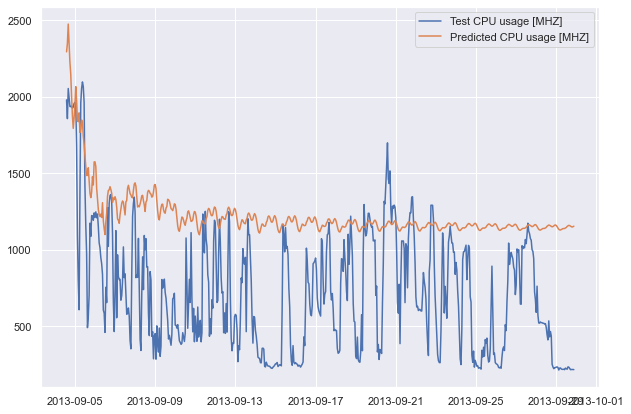

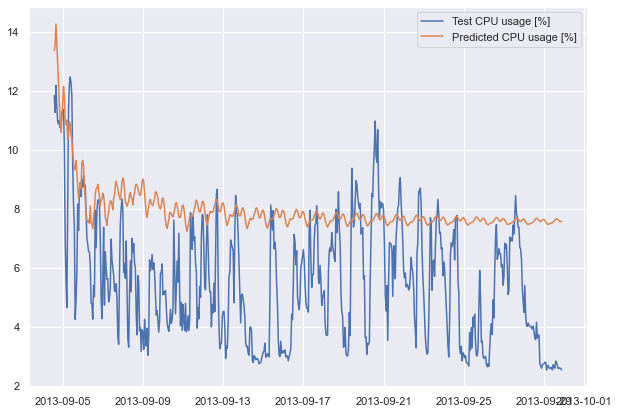

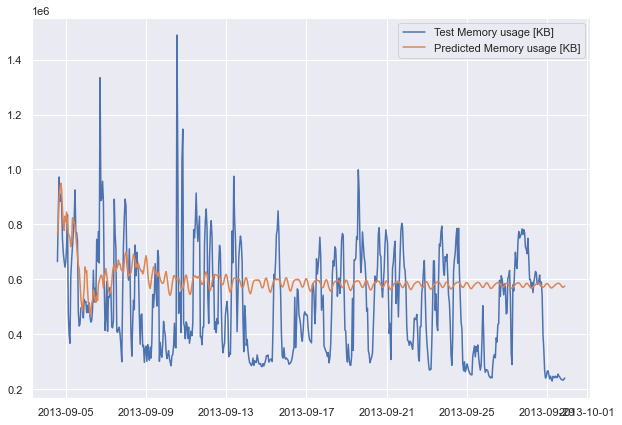

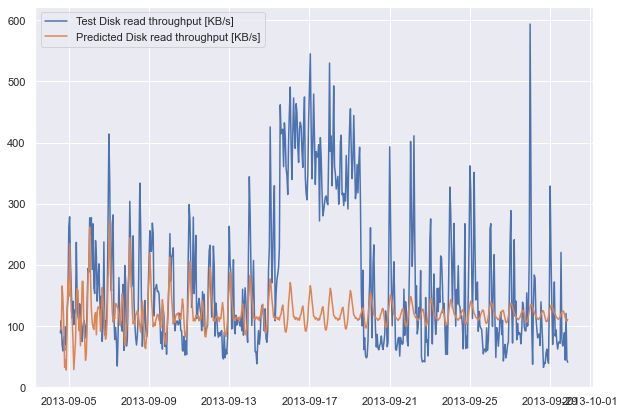

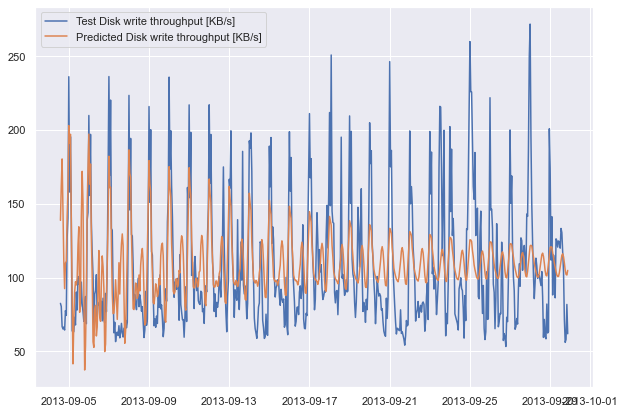

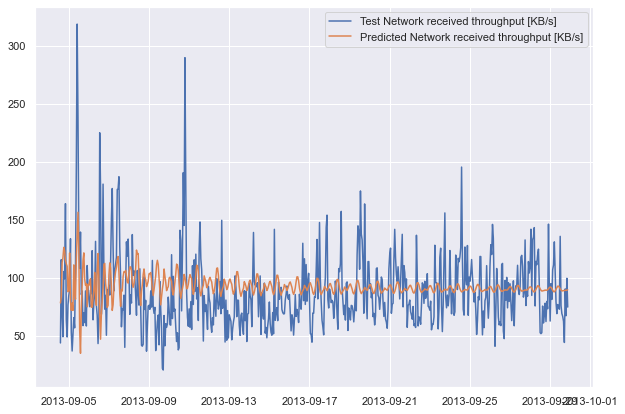

In [43]:

import matplotlib.pyplot as plt
%matplotlib inline
for i in  ['CPU usage [MHZ]','CPU usage [%]','Memory usage [KB]','Disk read throughput [KB/s]','Disk write throughput [KB/s]','Network received throughput [KB/s]']:
    
    plt.rcParams["figure.figsize"] = [10,7]
  
    plt.plot(test1[str(i)], label='Test '+str(i))
    plt.plot(prediction[str(i)], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

In [98]:
from pmdarima import auto_arima
ARIMA_model = auto_arima(df2['CPU usage [MHZ]'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=28854.559, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=32804.755, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=28858.537, Time=0.78 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=30845.214, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=35438.346, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=28853.005, Time=0.32 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=28854.599, Time=1.08 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=28856.542, Time=1.97 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=30992.596, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=28857.373, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=28854.595, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=28853.622, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=29912.983, Time=1.07 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=28852.566, Time=0.25 sec
 ARIM

In [70]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2136
Model:             SARIMAX(3, 0, 2)x(2, 0, [1], 7)   Log Likelihood              -14398.796
Date:                             Mon, 03 May 2021   AIC                          28817.592
Time:                                     15:04:14   BIC                          28874.259
Sample:                                          0   HQIC                         28838.329
                                            - 2136                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     75.1297     40.546      1.853      0.064      -4.340     154.599
ar.L1         -0.2912      0.096     -3.035      0.002      -0.479      -0.103
ar.L2          0.5448      0.067      8.161      0.000       0.414       0.676
ar.L3          0.4747      0.099      4.786      0.000       0.280       0.669
ma.L1          1.2708      0.090     14.155      0.000       1.095       1.447
ma.L2          0.6472      0.099      6.568      0.000       0.454       0.840
ar.S.L7        0.5897      0.182      3.248      0.001       0.234       0.946
ar.S.L14       0.0737      0.022      3.337      0.001       0.030       0.117
ma.S.L7       -0.6158      0.183     -3.373      0.001      -0.974      -0.258
sigma2      4.193e+04    873.239     48.020      0.000    4.02e+04    4.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2596.58
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             1.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         7.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
a_train=df2[0:1528]
a_test=df2[1528:]
ARIMA_model.fit(a_train['CPU usage [MHZ]'])

ARIMA(order=(3, 0, 2), scoring_args={}, seasonal_order=(2, 0, 1, 7),
      suppress_warnings=True)

In [79]:
prediction1=ARIMA_model.predict(n_periods=608,return_conf_int=True)

In [80]:
prediction1=pd.DataFrame(prediction[0],index=test1.index,columns=['prediction'])

In [81]:
len(data)

1528

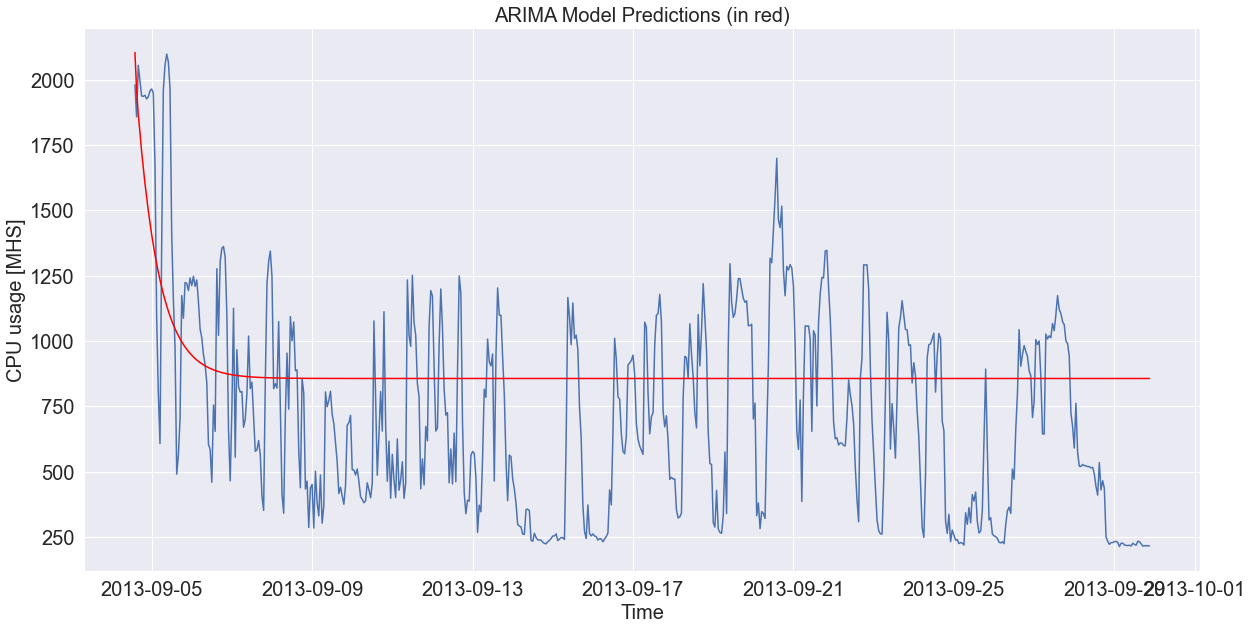

In [82]:
plt.figure(figsize=(20,10))
plt.plot(test1['CPU usage [MHZ]'])
plt.plot(prediction1, color='red')

plt.tick_params(labelsize=20)
plt.title("ARIMA Model Predictions (in red)", fontsize = 20)
plt.ylabel("CPU usage [MHS]", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.show();

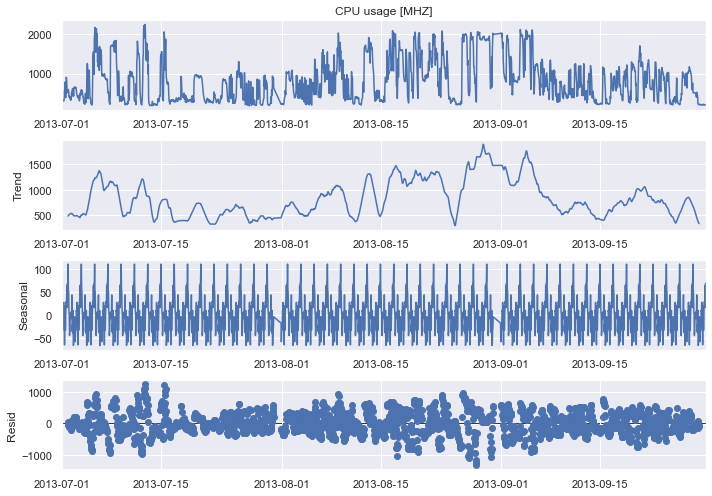

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition =seasonal_decompose(df2['CPU usage [MHZ]'], model="additive",period=45)
fig = decomposition.plot()
plt.show()